In [41]:
## id:14--14--14
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("week2.csv")
print(df.head())
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
Y=df.iloc[:,2]

   # id:14--14--14   Unnamed: 1  Unnamed: 2
0              0.81       -0.85           1
1             -0.21       -0.69           1
2             -0.66        0.55          -1
3             -0.84        0.99          -1
4             -0.90        0.44          -1


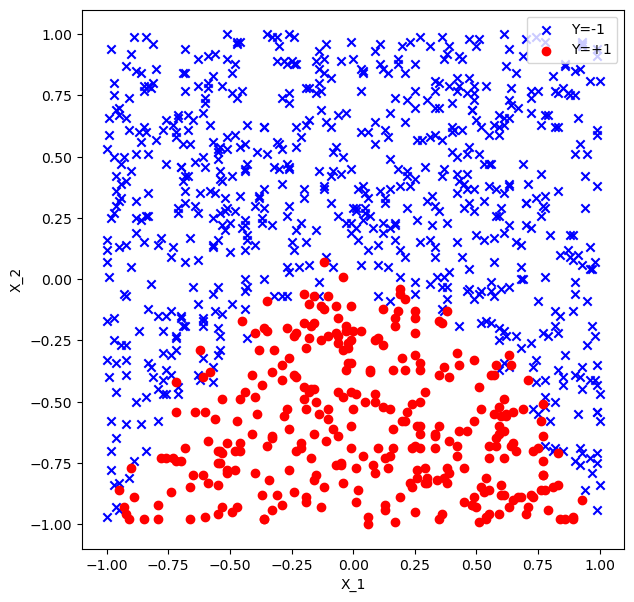

In [63]:
#A1        
points_1=plt.scatter(X1[Y<0],X2[Y<0],marker="x",color="blue",label="Y=-1")
points_2=plt.scatter(X1[Y>0],X2[Y>0],marker="o",color="red",label="Y=+1")
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend(handles=[points_1,points_2],loc='upper right')
plt.rcParams["figure.figsize"] = (7,7)
plt.show()

In [46]:
#A2
from sklearn.linear_model import LogisticRegression as LG
Logistic_Model=LG().fit(X,Y)
print("Intercept=",Logistic_Model.intercept_,"Coefficients(X1,X2)",Logistic_Model.coef_) #Intercept value and Weights value
y_prediction=Logistic_Model.predict(X) #Predicting the Model on the training data
accuracy = np.sum(np.equal(Y, y_prediction)) / len(Y) #Calculating the accuracy
print("Accuracy=",accuracy)

Intercept= [-1.75476793] Coefficients(X1,X2) [[-0.02844251 -4.7886813 ]]
Accuracy= 0.8608608608608609


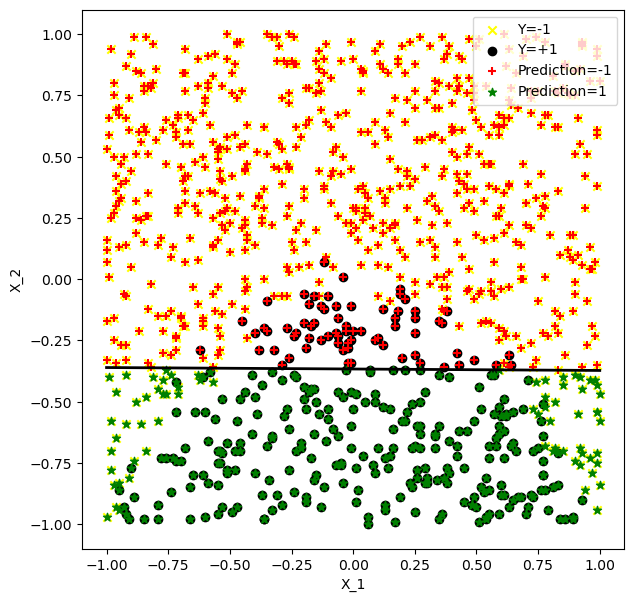

In [64]:
#A3
y_prediction=Logistic_Model.predict(X)    #Predicting the Model on the training data 
points_1=plt.scatter(X1[Y<0],X2[Y<0],marker="x",color="yellow",label="Y=-1")
points_2=plt.scatter(X1[Y>0],X2[Y>0],marker="o",color="black",label="Y=+1")
points_3=plt.scatter(X1[y_prediction<0],X2[y_prediction<0], marker="+",color="red",label="Prediction=-1")
points_4=plt.scatter(X1[y_prediction>0],X2[y_prediction>0],marker="*",color="green",label="Prediction=1")
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend(handles=[points_1,points_2,points_3,points_4],loc='upper right')
#z=w1x1+w2x2+b
b = Logistic_Model.intercept_[0] 
w1, w2 = Logistic_Model.coef_.T
#x2=mx1+c
c = -b/w2
m = -w1/w2
x1d = np.array([min(X1[:,]),max(X1[:,])]) #Minimum and Maximum value on X Axis
x2d = m*x1d + c
plt.plot(x1d, x2d, c='black', lw=2)
plt.rcParams["figure.figsize"] = (7,7)
plt.show()

In [48]:
#A4
accuracy = np.sum(np.equal(Y, y_prediction)) / len(Y) #Calculating the Accuracy
print("Accuracy=",accuracy)

Accuracy= 0.8608608608608609


In [67]:
#B1
from sklearn.svm import LinearSVC as lsvc
lsvc_1 = lsvc(C=0.0001,max_iter=100000).fit(X, Y)  #Fitting the Linear SVC Model with C values[0.0001,0.001,0.1,1,100]
lsvc_2 = lsvc(C=0.001,max_iter=100000).fit(X, Y)
lsvc_3 = lsvc(C=0.1,max_iter=100000).fit(X, Y)
lsvc_4 = lsvc(C=1,max_iter=100000).fit(X, Y)
lsvc_5 = lsvc(C=100,max_iter=100000).fit(X, Y)
print("C=0.0001 --- Intercept=",lsvc_1.intercept_, "Coefficeints(X,Y)=",lsvc_1.coef_) #Intercept value and Weights value
print("C=0.001 --- Intercept=",lsvc_2.intercept_, "Coefficeints(X,Y)=",lsvc_2.coef_)
print("C=0.1 --- Intercept=",lsvc_3.intercept_, "Coefficeints(X,Y)=",lsvc_3.coef_)
print("C=1 --- Intercept=",lsvc_4.intercept_, "Coefficeints(X,Y)=",lsvc_4.coef_)
print("C=100 --- Intercept=",lsvc_5.intercept_, "Coefficeints(X,Y)=",lsvc_5.coef_)

C=0.0001 --- Intercept= [-0.06008559] Coefficeints(X,Y)= [[ 0.00481313 -0.07307908]]
C=0.001 --- Intercept= [-0.23847911] Coefficeints(X,Y)= [[ 0.02226283 -0.46358762]]
C=0.1 --- Intercept= [-0.56485636] Coefficeints(X,Y)= [[-0.0083992  -1.61167902]]
C=1 --- Intercept= [-0.61158386] Coefficeints(X,Y)= [[-0.01287685 -1.7283451 ]]
C=100 --- Intercept= [-0.61809464] Coefficeints(X,Y)= [[-0.01343352 -1.74436966]]


In [53]:
#B1
y_prediction=lsvc_1.predict(X) #Calculating the accuracy of model when C values[0.0001,0.001,0.1,1,100]
print("Accuracy when C=0.0001 =",np.sum(np.equal(Y, y_prediction)) / len(Y))
y_prediction=lsvc_2.predict(X)
print("Accuracy when C=0.001 =",np.sum(np.equal(Y, y_prediction)) / len(Y))
y_prediction=lsvc_3.predict(X)
print("Accuracy when C=0.1 =",np.sum(np.equal(Y, y_prediction)) / len(Y))
y_prediction=lsvc_4.predict(X)
print("Accuracy when C=1 =",np.sum(np.equal(Y, y_prediction)) / len(Y))
y_prediction=lsvc_5.predict(X)
print("Accuracy when C=100 =",np.sum(np.equal(Y, y_prediction)) / len(Y))

Accuracy when C=0.0001 = 0.7557557557557557
Accuracy when C=0.001 = 0.8458458458458459
Accuracy when C=0.1 = 0.8568568568568569
Accuracy when C=1 = 0.8568568568568569
Accuracy when C=100 = 0.8568568568568569


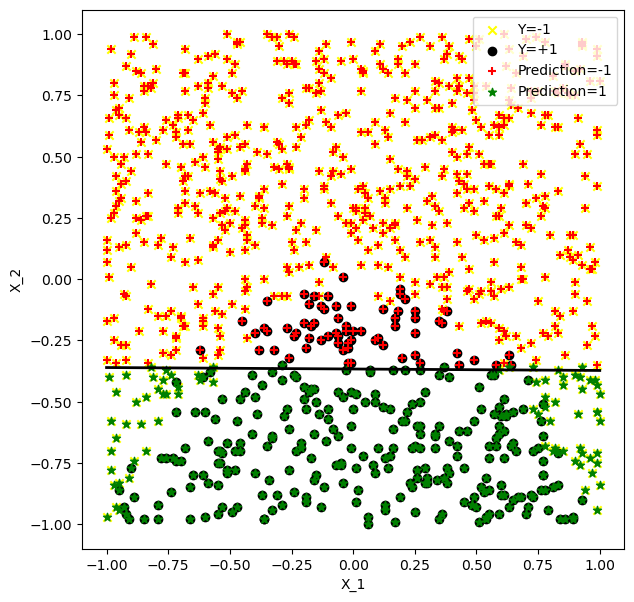

In [66]:
#B2
y_prediction=lsvc_3.predict(X) #Predicting value of Y with Training data when C=0.1
points_1=plt.scatter(X1[Y<0],X2[Y<0],marker="x",color="yellow",label="Y=-1")
points_2=plt.scatter(X1[Y>0],X2[Y>0],marker="o",color="black",label="Y=+1")
points_3=plt.scatter(X1[y_prediction<0],X2[y_prediction<0], marker="+",color="red",label="Prediction=-1")
points_4=plt.scatter(X1[y_prediction>0],X2[y_prediction>0],marker="*",color="green",label="Prediction=1")    
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend(handles=[points_1,points_2,points_3,points_4],loc='upper right')
#z=w1x1+w2x2+b
b = Logistic_Model.intercept_[0]
w1, w2 = Logistic_Model.coef_.T 
#x2=mx1+c
c = -b/w2
m = -w1/w2
x1d = np.array([min(X1[:,]),max(X1[:,])]) #Minimum and Maximum value on X Axis
x2d = m*x1d + c
plt.plot(x1d, x2d, c='black', lw=2)
plt.rcParams["figure.figsize"] = (7,7)
plt.show()

In [68]:
#B4
y_prediction=lsvc_3.predict(X)
print("Accuracy when C=0.1 =",np.sum(np.equal(Y, y_prediction)) / len(Y))

Accuracy when C=0.1 = 0.8568568568568569


In [59]:
#C1
X3=X1*X1.T
X4=X2*X2.T
X_Final=np.column_stack((X, X3, X4))
model_new = LG().fit(X_Final, Y)
print('Intercept=',model_new.intercept_,'Coefficients(X,Y)=',model_new.coef_) #Intercept value and Weights value
y_prediction=model_new.predict(X_Final) #Predicting value of Y with Training data
print("Accuracy=",np.sum(np.equal(Y, y_prediction)) / len(Y)) #Calculating the accuracy

Intercept= [-0.38367671] Coefficients(X,Y)= [[ 0.09756772 -6.80240725 -6.74528179  0.78087507]]
Accuracy= 0.965965965965966


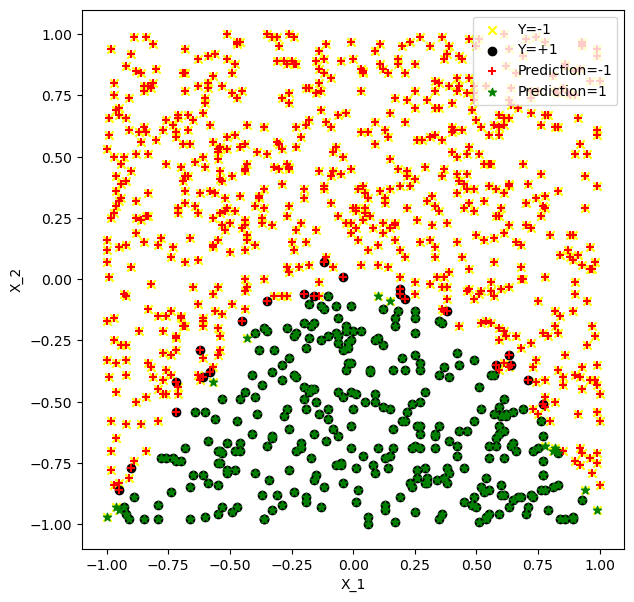

In [60]:
#C2
y_prediction=model_new.predict(X_Final) #Predicting value of Y with Training data
points_1=plt.scatter(X1[Y<0],X2[Y<0],marker="x",color="yellow",label="Y=-1")
points_2=plt.scatter(X1[Y>0],X2[Y>0],marker="o",color="black",label="Y=+1")
points_3=plt.scatter(X1[y_prediction<0],X2[y_prediction<0], marker="+",color="red",label="Prediction=-1")
points_4=plt.scatter(X1[y_prediction>0],X2[y_prediction>0],marker="*",color="green",label="Prediction=1")    
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend(handles=[points_1,points_2,points_3,points_4],loc='upper right')
plt.rcParams["figure.figsize"] = (7,7)
plt.show()

In [69]:
#C3
print("Baseline_Score=",((Y==-1).sum()/len(Y)))
y_prediction=model_new.predict(X_Final) #Predicting value of Y with Training data
print("Accuracy=",np.sum(np.equal(Y, y_prediction)) / len(Y))

Baseline_Score= 0.6806806806806807
Accuracy= 0.965965965965966


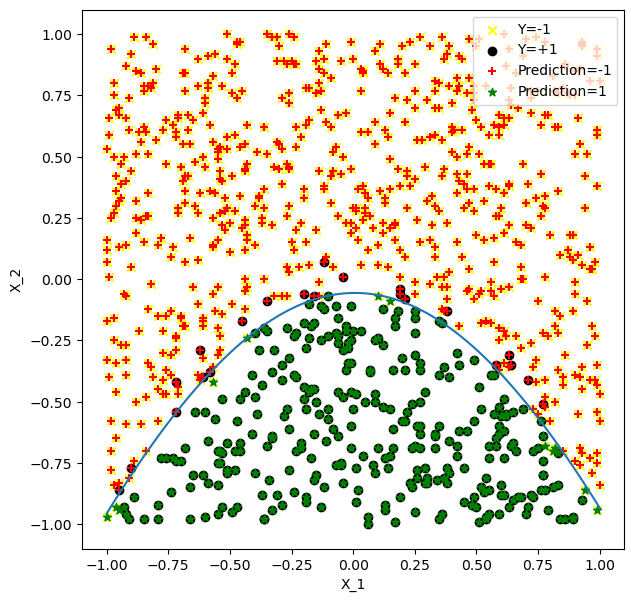

In [62]:
import math
w1,w2,w3,w4 = model_new.coef_.T  #Getting the weights of the model
intrcpt_val=model_new.intercept_ #Getting the intercept value of the model
def Val_Find(x1): #Function for calculating the values of x2 with respect to values of x1 based on the weights and intercept of the model
    c=(w3*x1*x1)+(w1*x1)+intrcpt_val
    b=w2
    a=w4
    Determinant=b*b-4*a*c
    if Determinant < 0: #If Determinant is less than zero roots are imaginary
        return None
    else:
        root_1=(-b+math.sqrt(Determinant))/(2*a)
        root_2=(-b-math.sqrt(Determinant))/(2*a)
        if root_1>=-1 and root_1 <= 1:
            return root_1
        else:
            return root_2

X_1 = np.linspace(min(X1[:,]),max(X1[:,]), 100) #Creating an array with 100 values ranging from min and max of training data
X_2 =[]
for x1 in X_1:
    X_2.append(Val_Find(x1))
points_1=plt.scatter(X1[Y<0],X2[Y<0],marker="x",color="yellow",label="Y=-1")
points_2=plt.scatter(X1[Y>0],X2[Y>0],marker="o",color="black",label="Y=+1")
points_3=plt.scatter(X1[y_prediction<0],X2[y_prediction<0], marker="+",color="red",label="Prediction=-1")
points_4=plt.scatter(X1[y_prediction>0],X2[y_prediction>0],marker="*",color="green",label="Prediction=1")   
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.legend(handles=[points_1,points_2,points_3,points_4],loc='upper right')
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(X_1,X_2)